In [2]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210219/'

In [4]:
files = sorted(glob(slowdir+'*'))[53:68]
files

['/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042220_Run22300736_000.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042225_Run22300736_001.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042808_Run22300736_002.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_045810_Run22300736_003.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_052909_Run22300736_004.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_055916_Run22300736_005.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_063004_Run22300736_006.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_070007_Run22300736_007.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_073050_Run22300736_008.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_080053_Run22300736_009.log.gz',
 '/data/pb2/ChileData/slowdaq/

In [5]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042220_Run22300736_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042225_Run22300736_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_042808_Run22300736_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_045810_Run22300736_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_052909_Run22300736_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_055916_Run22300736_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_063004_Run22300736_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_070007_Run22300736_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_073050_Run22300736_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210219/slowdaq_20210219_080053_Run22300736_0

In [6]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

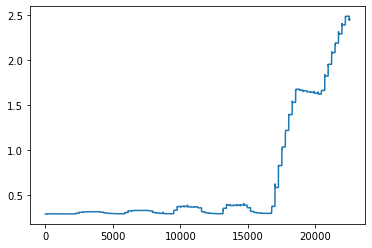

In [7]:
plt.plot(time, tmp)

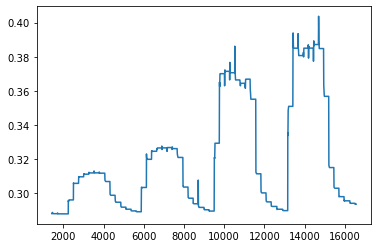

In [11]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 300
e = 3500
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [12]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [13]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  8,  10,  13,  15,  43,  46,  48,  51,  79,  81,  82,  84,  94,
       115, 118, 123, 128])

In [14]:
a = np.where(np.diff(rise)<15)[0]+1
a

array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 14, 15, 16])

In [15]:
start_indices = np.delete(rise, a)
start_indices

array([  8,  43,  79, 115])

In [16]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.round(start_indices + 25*60*conv).astype(dtype=np.int)

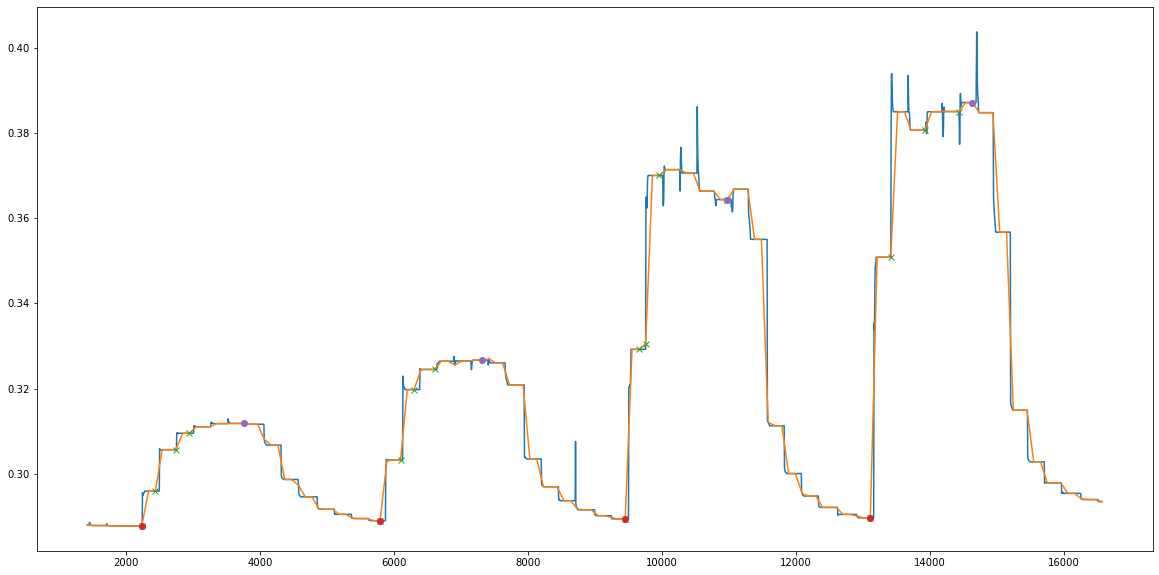

In [17]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')

In [18]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([24.06473222, 37.67170591, 74.96086915, 97.47068734])

In [72]:
az_v = np.linspace(1.95, 2.10, 4)
az_v

array([1.95, 2.  , 2.05, 2.1 , 2.15])

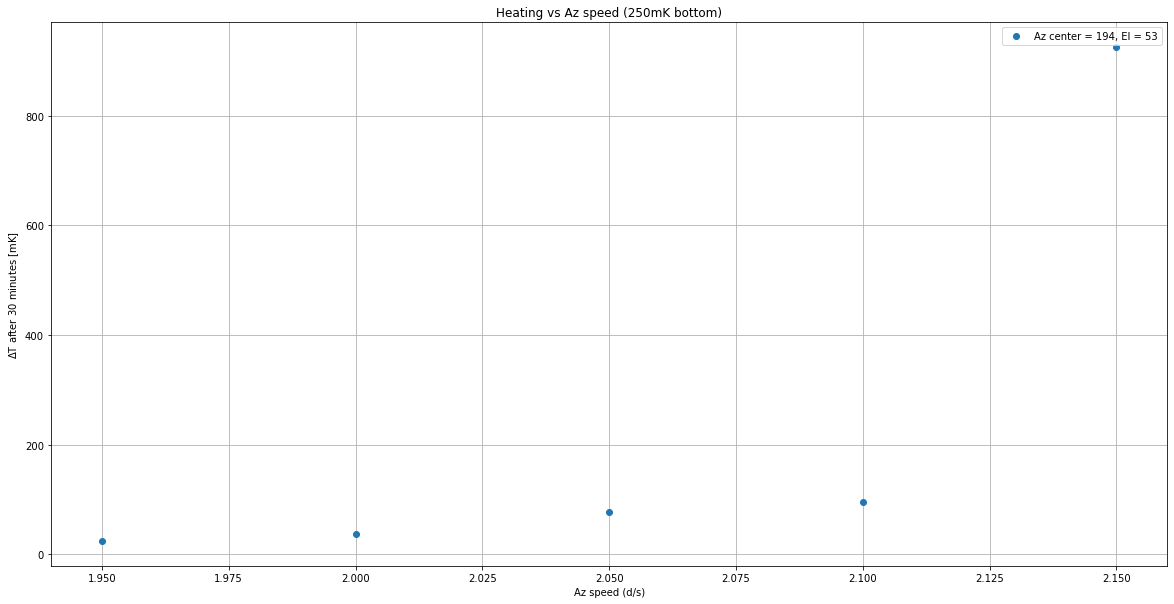

In [62]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 30 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()